In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

B. Time Series

Q2

In [4]:
bicycle_df = pd.read_csv('/content/Fremont_Bridge_Bicycle_Counter.csv', parse_dates=['Date'])
bicycle_df.head()

,Date,Fremont Bridge Total,Fremont Bridge East Sidewalk,Fremont Bridge West Sidewalk
0,2012-10-03 00:00:00,13.0,4.0,9.0
1,2012-10-03 01:00:00,10.0,4.0,6.0
2,2012-10-03 02:00:00,2.0,1.0,1.0
3,2012-10-03 03:00:00,5.0,2.0,3.0
4,2012-10-03 04:00:00,7.0,6.0,1.0


In [5]:
bicycle_df.iloc[0, 0].day_name()

'Wednesday'

In [6]:
bicycle_df['Date'].min()

Timestamp('2012-10-03 00:00:00')

In [7]:
bicycle_df['Date'].max()

Timestamp('2022-09-30 23:00:00')

In [8]:
bicycle_df['Date'].max() - bicycle_df['Date'].min()

Timedelta('3649 days 23:00:00')

Index by time

In [9]:
bicycle_df.set_index('Date', inplace=True)

In [10]:
bicycle_df.head()

,Fremont Bridge Total,Fremont Bridge East Sidewalk,Fremont Bridge West Sidewalk
Date,,,
2012-10-03 00:00:00,13.0,4.0,9.0
2012-10-03 01:00:00,10.0,4.0,6.0
2012-10-03 02:00:00,2.0,1.0,1.0
2012-10-03 03:00:00,5.0,2.0,3.0
2012-10-03 04:00:00,7.0,6.0,1.0


In [11]:
bicycle_df['2012-10-03 13:00:00':'2012-10-03 23:00:00']

,Fremont Bridge Total,Fremont Bridge East Sidewalk,Fremont Bridge West Sidewalk
Date,,,
2012-10-03 13:00:00,90.0,42.0,48.0
2012-10-03 14:00:00,128.0,77.0,51.0
2012-10-03 15:00:00,164.0,72.0,92.0
2012-10-03 16:00:00,315.0,133.0,182.0
2012-10-03 17:00:00,583.0,192.0,391.0
2012-10-03 18:00:00,380.0,122.0,258.0
2012-10-03 19:00:00,128.0,59.0,69.0
2012-10-03 20:00:00,80.0,29.0,51.0
2012-10-03 21:00:00,63.0,25.0,38.0


In [12]:
bicycle_df.loc['2012-10-03 00:00:00', :]

Fremont Bridge Total            13.0
Fremont Bridge East Sidewalk     4.0
Fremont Bridge West Sidewalk     9.0
Name: 2012-10-03 00:00:00, dtype: float64

In [13]:
bicycle_df.loc['2022']

,Fremont Bridge Total,Fremont Bridge East Sidewalk,Fremont Bridge West Sidewalk
Date,,,
2022-01-01 00:00:00,0.0,0.0,0.0
2022-01-01 01:00:00,0.0,0.0,0.0
2022-01-01 02:00:00,1.0,0.0,1.0
2022-01-01 03:00:00,0.0,0.0,0.0
2022-01-01 04:00:00,0.0,0.0,0.0
...,...,...,...
2022-09-30 19:00:00,168.0,57.0,111.0
2022-09-30 20:00:00,73.0,33.0,40.0
2022-09-30 21:00:00,69.0,30.0,39.0


Resample, Shifting and Windowing - Time Shifts, Rolling windows

In [14]:
bicycle_df.resample('W').mean()

,Fremont Bridge Total,Fremont Bridge East Sidewalk,Fremont Bridge West Sidewalk
Date,,,
2012-10-07,119.100000,60.808333,58.291667
2012-10-14,99.970238,51.660714,48.309524
2012-10-21,92.315476,47.297619,45.017857
2012-10-28,79.982143,41.077381,38.904762
2012-11-04,72.583333,38.142857,34.440476
...,...,...,...
2022-09-04,128.309524,51.761905,76.547619
2022-09-11,120.458333,49.523810,70.934524
2022-09-18,130.714286,53.654762,77.059524


In [15]:
bicycle_df.resample('MS').mean()

,Fremont Bridge Total,Fremont Bridge East Sidewalk,Fremont Bridge West Sidewalk
Date,,,
2012-10-01,94.389368,48.511494,45.877874
2012-11-01,70.343056,36.197222,34.145833
2012-12-01,48.883065,25.010753,23.872312
2013-01-01,60.327957,30.793011,29.534946
2013-02-01,74.444940,38.538690,35.906250
...,...,...,...
2022-05-01,98.783602,40.392473,58.391129
2022-06-01,118.415278,47.611111,70.804167
2022-07-01,134.262097,54.848118,79.413978


In [16]:
bicycle_df.resample('BQ').mean().head()

,Fremont Bridge Total,Fremont Bridge East Sidewalk,Fremont Bridge West Sidewalk
Date,,,
2012-12-31,70.699537,36.312037,34.387500
2013-03-29,73.964946,38.186168,35.778778
2013-06-28,127.971586,66.586159,61.385426
2013-09-30,136.848404,69.953014,66.895390
2013-12-31,83.412591,43.149909,40.262681


In [17]:
bicycle_df.shift(periods=3)

,Fremont Bridge Total,Fremont Bridge East Sidewalk,Fremont Bridge West Sidewalk
Date,,,
2012-10-03 00:00:00,NaN,NaN,NaN
2012-10-03 01:00:00,NaN,NaN,NaN
2012-10-03 02:00:00,NaN,NaN,NaN
2012-10-03 03:00:00,13.0,4.0,9.0
2012-10-03 04:00:00,10.0,4.0,6.0
...,...,...,...
2022-09-30 19:00:00,295.0,111.0,184.0
2022-09-30 20:00:00,410.0,172.0,238.0
2022-09-30 21:00:00,266.0,94.0,172.0


In [18]:
bicycle_df.shift(periods=1, axis='columns')

,Fremont Bridge Total,Fremont Bridge East Sidewalk,Fremont Bridge West Sidewalk
Date,,,
2012-10-03 00:00:00,NaN,13.0,4.0
2012-10-03 01:00:00,NaN,10.0,4.0
2012-10-03 02:00:00,NaN,2.0,1.0
2012-10-03 03:00:00,NaN,5.0,2.0
2012-10-03 04:00:00,NaN,7.0,6.0
...,...,...,...
2022-09-30 19:00:00,NaN,168.0,57.0
2022-09-30 20:00:00,NaN,73.0,33.0
2022-09-30 21:00:00,NaN,69.0,30.0


In [19]:
bicycle_df.tshift(periods=5)

<ipython-input-19-b2b9d99f85d7>:1: FutureWarning: tshift is deprecated and will be removed in a future version. Please use shift instead.
  bicycle_df.tshift(periods=5)


,Fremont Bridge Total,Fremont Bridge East Sidewalk,Fremont Bridge West Sidewalk
Date,,,
2012-10-03 05:00:00,13.0,4.0,9.0
2012-10-03 06:00:00,10.0,4.0,6.0
2012-10-03 07:00:00,2.0,1.0,1.0
2012-10-03 08:00:00,5.0,2.0,3.0
2012-10-03 09:00:00,7.0,6.0,1.0
...,...,...,...
2022-10-01 00:00:00,168.0,57.0,111.0
2022-10-01 01:00:00,73.0,33.0,40.0
2022-10-01 02:00:00,69.0,30.0,39.0


In [20]:
bicycle_df['Fremont Bridge West Sidewalk'].rolling(window=5).agg([np.sum, np.mean, np.std])

,sum,mean,std
Date,,,
2012-10-03 00:00:00,NaN,NaN,NaN
2012-10-03 01:00:00,NaN,NaN,NaN
2012-10-03 02:00:00,NaN,NaN,NaN
2012-10-03 03:00:00,NaN,NaN,NaN
2012-10-03 04:00:00,20.0,4.0,3.464102
...,...,...,...
2022-09-30 19:00:00,847.0,169.4,47.663403
2022-09-30 20:00:00,745.0,149.0,75.828754
2022-09-30 21:00:00,600.0,120.0,86.124909


In [21]:
bicycle_df['Fremont Bridge West Sidewalk'].rolling(window=5, center=True).agg([np.sum, np.mean, np.std])

,sum,mean,std
Date,,,
2012-10-03 00:00:00,NaN,NaN,NaN
2012-10-03 01:00:00,NaN,NaN,NaN
2012-10-03 02:00:00,20.0,4.0,3.464102
2012-10-03 03:00:00,21.0,4.2,3.834058
2012-10-03 04:00:00,65.0,13.0,21.011901
...,...,...,...
2022-09-30 19:00:00,600.0,120.0,86.124909
2022-09-30 20:00:00,403.0,80.6,59.634721
2022-09-30 21:00:00,268.0,53.6,32.121644


Visualizations

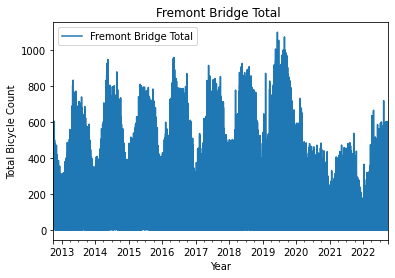

In [22]:
bicycle_df['Fremont Bridge Total'].plot()
plt.legend()
plt.xlabel('Year')
plt.ylabel('Total Bicycle Count')
plt.title('Fremont Bridge Total ')
plt.show()

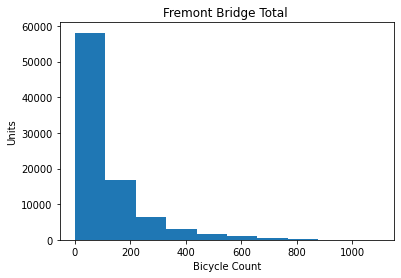

In [23]:
plt.hist(bicycle_df['Fremont Bridge Total'], bins=10)
plt.xlabel('Bicycle Count')
plt.ylabel('Units')
plt.title('Fremont Bridge Total ')
plt.show()

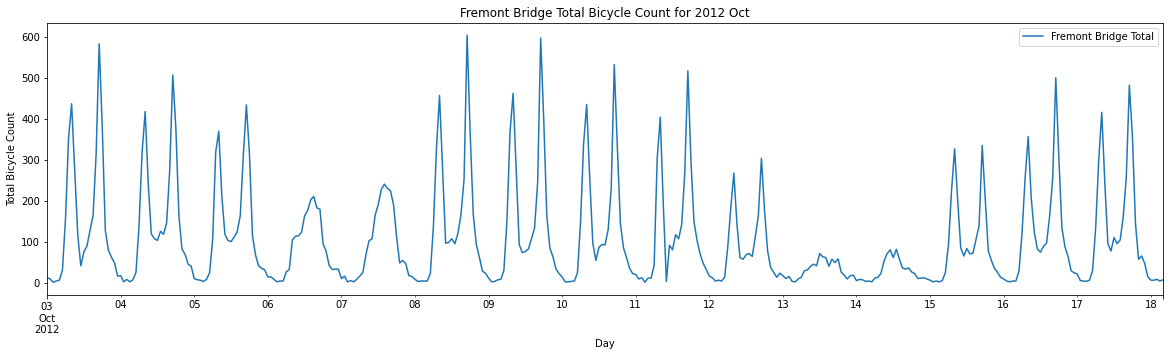

In [24]:
bicycle_df['Fremont Bridge Total'].head(365).plot(figsize=(20, 5))
plt.legend()
plt.xlabel('Day')
plt.ylabel('Total Bicycle Count')
plt.title('Fremont Bridge Total Bicycle Count for 2012 Oct')
plt.show()

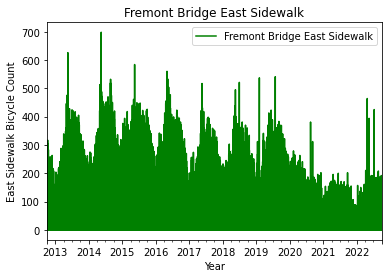

In [25]:
bicycle_df['Fremont Bridge East Sidewalk'].plot(c='g')
plt.legend()
plt.xlabel('Year')
plt.ylabel('East Sidewalk Bicycle Count')
plt.title('Fremont Bridge East Sidewalk')
plt.show()

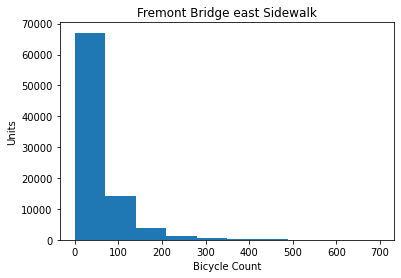

In [26]:
plt.hist(bicycle_df['Fremont Bridge East Sidewalk'], bins=10)
plt.xlabel('Bicycle Count')
plt.ylabel('Units')
plt.title('Fremont Bridge east Sidewalk')
plt.show()

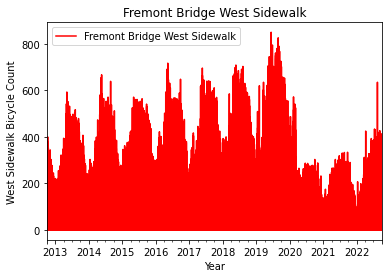

In [27]:
bicycle_df['Fremont Bridge West Sidewalk'].plot(c='r')
plt.legend()
plt.xlabel('Year')
plt.ylabel('West Sidewalk Bicycle Count')
plt.title('Fremont Bridge West Sidewalk')
plt.show()

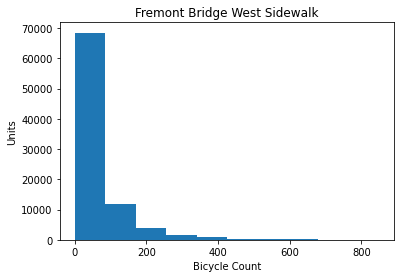

In [28]:
plt.hist(bicycle_df['Fremont Bridge West Sidewalk'], bins=10)
plt.xlabel('Bicycle Count')
plt.ylabel('Units')
plt.title('Fremont Bridge West Sidewalk')
plt.show()

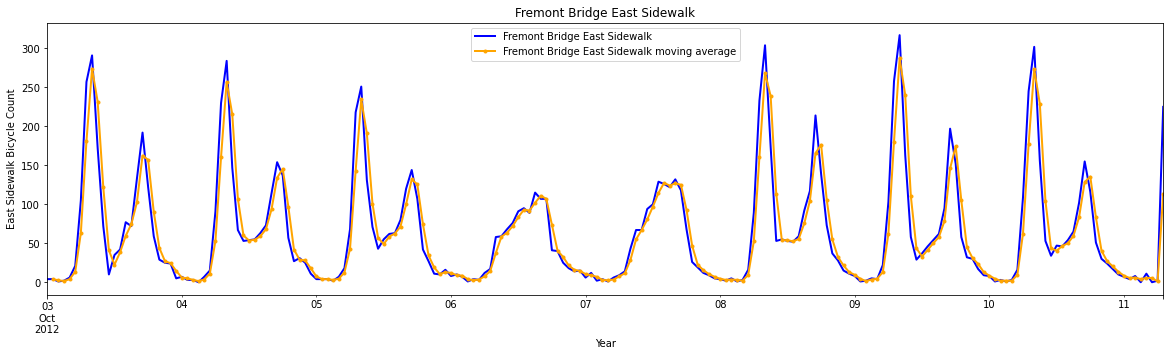

In [29]:
bicycle_df['Fremont Bridge East Sidewalk'].head(200).plot(c='blue', figsize=(20, 5), lw=2)
bicycle_df['Fremont Bridge East Sidewalk'].head(200).rolling(window=2).mean().plot(c='orange', marker='.', lw=2, label='Fremont Bridge East Sidewalk moving average')
plt.legend()
plt.xlabel('Year')
plt.ylabel('East Sidewalk Bicycle Count')
plt.title('Fremont Bridge East Sidewalk')
plt.show()

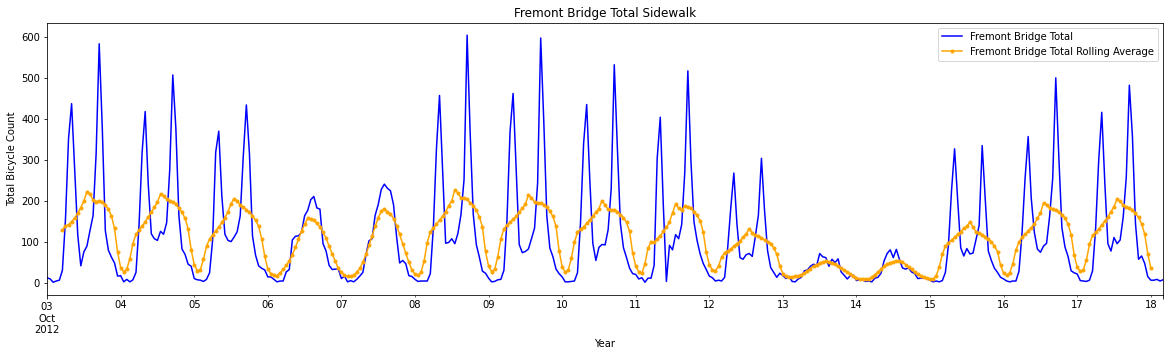

In [30]:
bicycle_df['Fremont Bridge Total'].head(365).plot(c='blue', figsize=(20, 5))
bicycle_df['Fremont Bridge Total'].head(365).rolling(window=10, center=True).mean().plot(c='orange', marker='.', label='Fremont Bridge Total Rolling Average')
plt.legend()
plt.xlabel('Year')
plt.ylabel('Total Bicycle Count')
plt.title('Fremont Bridge Total Sidewalk')
plt.show()

<ipython-input-31-7024ea21072d>:5: FutureWarning: tshift is deprecated and will be removed in a future version. Please use shift instead.
  df.tshift(365).plot(ax=ax[2])


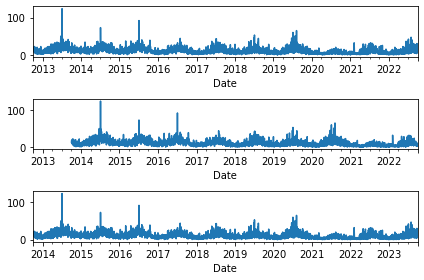

In [31]:
fig, ax = plt.subplots(3)
df = bicycle_df['Fremont Bridge Total'].asfreq('D', method='pad')
df.plot(ax=ax[0])
df.shift(365).plot(ax=ax[1])
df.tshift(365).plot(ax=ax[2])
fig.tight_layout()
plt.show()

Q3

In [32]:
stock_df = pd.read_csv('https://raw.githubusercontent.com/wesm/pydata-book/3rd-edition/examples/stock_px.csv', parse_dates=True)
stock_df.dropna(axis=0, inplace=True)
stock_df.rename(columns={"Unnamed: 0":"Date"}, inplace=True)
stock_df.head()

,Date,AAPL,MSFT,XOM,SPX
0,2003-01-02 00:00:00,7.40,21.11,29.22,909.03
1,2003-01-03 00:00:00,7.45,21.14,29.24,908.59
2,2003-01-06 00:00:00,7.45,21.52,29.96,929.01
3,2003-01-07 00:00:00,7.43,21.93,28.95,922.93
4,2003-01-08 00:00:00,7.28,21.31,28.83,909.93


In [33]:
stock_df.shape

(2214, 5)

In [34]:
stock_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2214 entries, 0 to 2213
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    2214 non-null   object 
 1   AAPL    2214 non-null   float64
 2   MSFT    2214 non-null   float64
 3   XOM     2214 non-null   float64
 4   SPX     2214 non-null   float64
dtypes: float64(4), object(1)
memory usage: 103.8+ KB


Indexing, selection, subsetting

In [35]:
stock_df.set_index('Date', inplace=True)

In [36]:
stock_df.head()

,AAPL,MSFT,XOM,SPX
Date,,,,
2003-01-02 00:00:00,7.40,21.11,29.22,909.03
2003-01-03 00:00:00,7.45,21.14,29.24,908.59
2003-01-06 00:00:00,7.45,21.52,29.96,929.01
2003-01-07 00:00:00,7.43,21.93,28.95,922.93
2003-01-08 00:00:00,7.28,21.31,28.83,909.93


In [37]:
stock_df.loc['2003-01-10 00:00:00', :]

AAPL      7.36
MSFT     21.97
XOM      29.03
SPX     927.57
Name: 2003-01-10 00:00:00, dtype: float64

In [38]:
stock_df.loc['2003-01-10 00:00:00':'2003-01-15 00:00:00', :]

,AAPL,MSFT,XOM,SPX
Date,,,,
2003-01-10 00:00:00,7.36,21.97,29.03,927.57
2003-01-13 00:00:00,7.32,22.16,28.91,926.26
2003-01-14 00:00:00,7.30,22.39,29.17,931.66
2003-01-15 00:00:00,7.22,22.11,28.77,918.22


Date Ranges, Frequencies and shifting data

In [39]:
pd.date_range('2023-01-01', periods=20)

DatetimeIndex(['2023-01-01', '2023-01-02', '2023-01-03', '2023-01-04',
               '2023-01-05', '2023-01-06', '2023-01-07', '2023-01-08',
               '2023-01-09', '2023-01-10', '2023-01-11', '2023-01-12',
               '2023-01-13', '2023-01-14', '2023-01-15', '2023-01-16',
               '2023-01-17', '2023-01-18', '2023-01-19', '2023-01-20'],
              dtype='datetime64[ns]', freq='D')

In [40]:
pd.date_range("2023-01-01", "2023-12-01", freq="BM")

DatetimeIndex(['2023-01-31', '2023-02-28', '2023-03-31', '2023-04-28',
               '2023-05-31', '2023-06-30', '2023-07-31', '2023-08-31',
               '2023-09-29', '2023-10-31', '2023-11-30'],
              dtype='datetime64[ns]', freq='BM')

In [41]:
pd.date_range("2023-01-01", "2023-01-02", freq="4H")

DatetimeIndex(['2023-01-01 00:00:00', '2023-01-01 04:00:00',
               '2023-01-01 08:00:00', '2023-01-01 12:00:00',
               '2023-01-01 16:00:00', '2023-01-01 20:00:00',
               '2023-01-02 00:00:00'],
              dtype='datetime64[ns]', freq='4H')

In [42]:
pd.date_range("2023-01-01", "2023-12-01", freq="WOM-3FRI")

DatetimeIndex(['2023-01-20', '2023-02-17', '2023-03-17', '2023-04-21',
               '2023-05-19', '2023-06-16', '2023-07-21', '2023-08-18',
               '2023-09-15', '2023-10-20', '2023-11-17'],
              dtype='datetime64[ns]', freq='WOM-3FRI')

In [43]:
stock_df.shift(3)

,AAPL,MSFT,XOM,SPX
Date,,,,
2003-01-02 00:00:00,NaN,NaN,NaN,NaN
2003-01-03 00:00:00,NaN,NaN,NaN,NaN
2003-01-06 00:00:00,NaN,NaN,NaN,NaN
2003-01-07 00:00:00,7.40,21.11,29.22,909.03
2003-01-08 00:00:00,7.45,21.14,29.24,908.59
...,...,...,...,...
2011-10-10 00:00:00,378.25,25.89,73.95,1144.03
2011-10-11 00:00:00,377.37,26.34,73.89,1164.97
2011-10-12 00:00:00,369.80,26.25,73.56,1155.46


In [44]:
stock_df.shift(periods=1, axis='columns')

,AAPL,MSFT,XOM,SPX
Date,,,,
2003-01-02 00:00:00,NaN,7.40,21.11,29.22
2003-01-03 00:00:00,NaN,7.45,21.14,29.24
2003-01-06 00:00:00,NaN,7.45,21.52,29.96
2003-01-07 00:00:00,NaN,7.43,21.93,28.95
2003-01-08 00:00:00,NaN,7.28,21.31,28.83
...,...,...,...,...
2011-10-10 00:00:00,NaN,388.81,26.94,76.28
2011-10-11 00:00:00,NaN,400.29,27.00,76.27
2011-10-12 00:00:00,NaN,402.19,26.96,77.16


Time Zone Localization and Conversion

In [45]:
times = stock_df.copy()
times.reset_index(inplace=True)
times = times['Date']
times = pd.to_datetime(times)

In [46]:
time_zone_localized = times.dt.tz_localize('UTC')

In [47]:
time_zone_localized

0      2003-01-02 00:00:00+00:00
1      2003-01-03 00:00:00+00:00
2      2003-01-06 00:00:00+00:00
3      2003-01-07 00:00:00+00:00
4      2003-01-08 00:00:00+00:00
                  ...           
2209   2011-10-10 00:00:00+00:00
2210   2011-10-11 00:00:00+00:00
2211   2011-10-12 00:00:00+00:00
2212   2011-10-13 00:00:00+00:00
2213   2011-10-14 00:00:00+00:00
Name: Date, Length: 2214, dtype: datetime64[ns, UTC]

In [48]:
time_zone_localized.dt.tz_convert("America/New_York")

0      2003-01-01 19:00:00-05:00
1      2003-01-02 19:00:00-05:00
2      2003-01-05 19:00:00-05:00
3      2003-01-06 19:00:00-05:00
4      2003-01-07 19:00:00-05:00
                  ...           
2209   2011-10-09 20:00:00-04:00
2210   2011-10-10 20:00:00-04:00
2211   2011-10-11 20:00:00-04:00
2212   2011-10-12 20:00:00-04:00
2213   2011-10-13 20:00:00-04:00
Name: Date, Length: 2214, dtype: datetime64[ns, America/New_York]

In [49]:
time_zone_localized.dt.tz_convert("Europe/Berlin")

0      2003-01-02 01:00:00+01:00
1      2003-01-03 01:00:00+01:00
2      2003-01-06 01:00:00+01:00
3      2003-01-07 01:00:00+01:00
4      2003-01-08 01:00:00+01:00
                  ...           
2209   2011-10-10 02:00:00+02:00
2210   2011-10-11 02:00:00+02:00
2211   2011-10-12 02:00:00+02:00
2212   2011-10-13 02:00:00+02:00
2213   2011-10-14 02:00:00+02:00
Name: Date, Length: 2214, dtype: datetime64[ns, Europe/Berlin]

In [50]:
time_zone_localized.dt.tz_convert("Asia/Shanghai")

0      2003-01-02 08:00:00+08:00
1      2003-01-03 08:00:00+08:00
2      2003-01-06 08:00:00+08:00
3      2003-01-07 08:00:00+08:00
4      2003-01-08 08:00:00+08:00
                  ...           
2209   2011-10-10 08:00:00+08:00
2210   2011-10-11 08:00:00+08:00
2211   2011-10-12 08:00:00+08:00
2212   2011-10-13 08:00:00+08:00
2213   2011-10-14 08:00:00+08:00
Name: Date, Length: 2214, dtype: datetime64[ns, Asia/Shanghai]

In [51]:
times.index

RangeIndex(start=0, stop=2214, step=1)

In [52]:
time_zone_localized.index

RangeIndex(start=0, stop=2214, step=1)

Periods and Period Arithmetic

In [53]:
time_zone_localized.index = pd.PeriodIndex(times, freq='D')
time_zone_localized

Date
2003-01-02   2003-01-02 00:00:00+00:00
2003-01-03   2003-01-03 00:00:00+00:00
2003-01-06   2003-01-06 00:00:00+00:00
2003-01-07   2003-01-07 00:00:00+00:00
2003-01-08   2003-01-08 00:00:00+00:00
                        ...           
2011-10-10   2011-10-10 00:00:00+00:00
2011-10-11   2011-10-11 00:00:00+00:00
2011-10-12   2011-10-12 00:00:00+00:00
2011-10-13   2011-10-13 00:00:00+00:00
2011-10-14   2011-10-14 00:00:00+00:00
Freq: D, Name: Date, Length: 2214, dtype: datetime64[ns, UTC]

In [54]:
time_zone_localized.index = pd.PeriodIndex(times, freq='M')
time_zone_localized

Date
2003-01   2003-01-02 00:00:00+00:00
2003-01   2003-01-03 00:00:00+00:00
2003-01   2003-01-06 00:00:00+00:00
2003-01   2003-01-07 00:00:00+00:00
2003-01   2003-01-08 00:00:00+00:00
                     ...           
2011-10   2011-10-10 00:00:00+00:00
2011-10   2011-10-11 00:00:00+00:00
2011-10   2011-10-12 00:00:00+00:00
2011-10   2011-10-13 00:00:00+00:00
2011-10   2011-10-14 00:00:00+00:00
Freq: M, Name: Date, Length: 2214, dtype: datetime64[ns, UTC]

In [55]:
time_zone_localized.index + 5

PeriodIndex(['2003-06', '2003-06', '2003-06', '2003-06', '2003-06', '2003-06',
             '2003-06', '2003-06', '2003-06', '2003-06',
             ...
             '2012-03', '2012-03', '2012-03', '2012-03', '2012-03', '2012-03',
             '2012-03', '2012-03', '2012-03', '2012-03'],
            dtype='period[M]', name='Date', length=2214)

In [56]:
time_zone_localized.index - 2

PeriodIndex(['2002-11', '2002-11', '2002-11', '2002-11', '2002-11', '2002-11',
             '2002-11', '2002-11', '2002-11', '2002-11',
             ...
             '2011-08', '2011-08', '2011-08', '2011-08', '2011-08', '2011-08',
             '2011-08', '2011-08', '2011-08', '2011-08'],
            dtype='period[M]', name='Date', length=2214)

Period Frequency Conversion

In [57]:
p = pd.PeriodIndex(time_zone_localized.index, freq='M')
p = p.asfreq('Q')
p

PeriodIndex(['2003Q1', '2003Q1', '2003Q1', '2003Q1', '2003Q1', '2003Q1',
             '2003Q1', '2003Q1', '2003Q1', '2003Q1',
             ...
             '2011Q4', '2011Q4', '2011Q4', '2011Q4', '2011Q4', '2011Q4',
             '2011Q4', '2011Q4', '2011Q4', '2011Q4'],
            dtype='period[Q-DEC]', name='Date', length=2214)

In [58]:
p.asfreq("M", how="start")

PeriodIndex(['2003-01', '2003-01', '2003-01', '2003-01', '2003-01', '2003-01',
             '2003-01', '2003-01', '2003-01', '2003-01',
             ...
             '2011-10', '2011-10', '2011-10', '2011-10', '2011-10', '2011-10',
             '2011-10', '2011-10', '2011-10', '2011-10'],
            dtype='period[M]', name='Date', length=2214)

In [59]:
p.asfreq("M", how="end")

PeriodIndex(['2003-03', '2003-03', '2003-03', '2003-03', '2003-03', '2003-03',
             '2003-03', '2003-03', '2003-03', '2003-03',
             ...
             '2011-12', '2011-12', '2011-12', '2011-12', '2011-12', '2011-12',
             '2011-12', '2011-12', '2011-12', '2011-12'],
            dtype='period[M]', name='Date', length=2214)

In [60]:
p.asfreq("M")

PeriodIndex(['2003-03', '2003-03', '2003-03', '2003-03', '2003-03', '2003-03',
             '2003-03', '2003-03', '2003-03', '2003-03',
             ...
             '2011-12', '2011-12', '2011-12', '2011-12', '2011-12', '2011-12',
             '2011-12', '2011-12', '2011-12', '2011-12'],
            dtype='period[M]', name='Date', length=2214)

Resampling and Frequency Conversion

In [61]:
stocks = stock_df.copy()

In [62]:
stocks.index = pd.to_datetime(stocks.index)

In [63]:
stocks.resample('M')['AAPL'].mean()

Date
2003-01-31      7.239048
2003-02-28      7.333684
2003-03-31      7.299048
2003-04-30      6.923810
2003-05-31      8.885238
                 ...    
2011-06-30    331.081364
2011-07-31    372.238000
2011-08-31    376.762609
2011-09-30    392.493333
2011-10-31    389.424000
Freq: M, Name: AAPL, Length: 106, dtype: float64

In [64]:
stocks.resample("M", kind="period").mean()

,AAPL,MSFT,XOM,SPX
Date,,,,
2003-01,7.239048,20.742381,28.356190,895.836190
2003-02,7.333684,18.786316,27.985263,837.618947
2003-03,7.299048,19.395238,29.065238,846.621429
2003-04,6.923810,19.871429,29.050476,890.025714
2003-05,8.885238,19.946667,29.728571,935.962857
...,...,...,...,...
2011-06,331.081364,24.299091,79.365909,1287.288636
2011-07,372.238000,26.799000,82.196500,1325.184500
2011-08,376.762609,25.317826,73.058696,1185.305652


In [65]:
stocks.resample("Q").mean()

,AAPL,MSFT,XOM,SPX
Date,,,,
2003-03-31,7.289180,19.669344,28.484754,860.760164
2003-06-30,8.299365,19.888254,29.950476,937.994603
2003-09-30,10.499844,21.374531,30.640156,1000.380469
2003-12-31,10.893906,21.393906,31.684062,1056.452500
2004-03-31,12.031613,21.134194,35.204677,1132.671290
2004-06-30,14.335645,20.960161,37.141290,1123.196452
2004-09-30,16.609219,21.954062,39.726094,1103.908281
2004-12-31,27.792813,23.303125,43.260781,1162.652031
2005-03-31,39.535574,22.722295,49.193279,1191.947869


In [66]:
stocks.resample("M").ohlc()

AAPL                           MSFT                         XOM  \
              open    high     low   close   open   high    low  close   open   
Date                                                                            
2003-01-31    7.40    7.47    6.90    7.18  21.11  22.39  18.65  18.65  29.22   
2003-02-28    7.33    7.64    7.07    7.51  19.08  19.61  18.25  18.68  28.52   
2003-03-31    7.32    7.51    7.07    7.07  18.56  20.95  17.98  19.09  28.58   
2003-04-30    7.08    7.30    6.56    7.11  19.20  20.34  19.08  20.16  29.56   
2003-05-31    7.18    9.44    7.18    8.98  20.28  20.79  18.94  19.40  29.42   
...            ...     ...     ...     ...    ...    ...    ...    ...    ...   
2011-06-30  345.51  346.10  315.32  335.67  24.28  25.84  23.56  25.84  81.49   
2011-07-31  343.26  403.41  343.26  390.48  25.86  27.90  25.86  27.23  81.47   
2011-08-31  396.75  396.75  353.21  384.83  27.10  27.10  23.98  26.60  79.08   
2011-09-30  381.03  413.45  374.05  381.32  26.21  27.21  24.89  24.89  73.49   
2011-10-31  374.60  422.00  369.80  422.00  24.53  27.27  24.53  27.27  71.15   

                                     SPX                             
             high    low  close     open     high      low    close  
Date                                                                 
2003-01-31  29.96  26.21  28.13   909.03   931.66   844.61   855.70  
2003-02-28  28.52  27.12  28.21   860.32   860.32   817.37   841.15  
2003-03-31  29.88  28.24  28.98   834.81   895.79   800.73   848.18  
2003-04-30  29.60  28.47  29.19   858.48   919.02   858.48   916.92  
2003-05-31  30.66  29.19  30.40   916.30   963.59   916.30   963.59  
...           ...    ...    ...      ...      ...      ...      ...  
2011-06-30  81.49  76.28  80.85  1314.55  1320.64  1265.42  1320.64  
2011-07-31  84.66  79.27  79.27  1339.67  1353.22  1292.28  1292.28  
2011-08-31  79.08  68.03  74.02  1286.94  1286.94  1119.46  1218.89  
2011-09-30  74.55  69.24  72.63  1204.42  1216.01  1129.56  1131.42  
2011-10-31  78.11  71.15  78.11  1099.23  1224.58  1099.23  1224.58  

[106 rows x 16 columns]

Downsampling and Upsampling

Downsampling - Downsampling is aggregating data to a regular, lower frequency. 

In [67]:
stocks.resample("5min").sum()

,AAPL,MSFT,XOM,SPX
Date,,,,
2003-01-02 00:00:00,7.4,21.11,29.22,909.03
2003-01-02 00:05:00,0.0,0.00,0.00,0.00
2003-01-02 00:10:00,0.0,0.00,0.00,0.00
2003-01-02 00:15:00,0.0,0.00,0.00,0.00
2003-01-02 00:20:00,0.0,0.00,0.00,0.00
...,...,...,...,...
2011-10-13 23:40:00,0.0,0.00,0.00,0.00
2011-10-13 23:45:00,0.0,0.00,0.00,0.00
2011-10-13 23:50:00,0.0,0.00,0.00,0.00


In [68]:
stocks.resample("5min", closed="right").sum()

,AAPL,MSFT,XOM,SPX
Date,,,,
2003-01-01 23:55:00,7.4,21.11,29.22,909.03
2003-01-02 00:00:00,0.0,0.00,0.00,0.00
2003-01-02 00:05:00,0.0,0.00,0.00,0.00
2003-01-02 00:10:00,0.0,0.00,0.00,0.00
2003-01-02 00:15:00,0.0,0.00,0.00,0.00
...,...,...,...,...
2011-10-13 23:35:00,0.0,0.00,0.00,0.00
2011-10-13 23:40:00,0.0,0.00,0.00,0.00
2011-10-13 23:45:00,0.0,0.00,0.00,0.00


Upsampling - Upsampling is converting from a lower frequency to a higher frequency, where no aggregation is needed. 

In [69]:
daily = stocks.resample("D").asfreq()
daily

,AAPL,MSFT,XOM,SPX
Date,,,,
2003-01-02,7.40,21.11,29.22,909.03
2003-01-03,7.45,21.14,29.24,908.59
2003-01-04,NaN,NaN,NaN,NaN
2003-01-05,NaN,NaN,NaN,NaN
2003-01-06,7.45,21.52,29.96,929.01
...,...,...,...,...
2011-10-10,388.81,26.94,76.28,1194.89
2011-10-11,400.29,27.00,76.27,1195.54
2011-10-12,402.19,26.96,77.16,1207.25


In [70]:
stocks.resample("D").ffill()

,AAPL,MSFT,XOM,SPX
Date,,,,
2003-01-02,7.40,21.11,29.22,909.03
2003-01-03,7.45,21.14,29.24,908.59
2003-01-04,7.45,21.14,29.24,908.59
2003-01-05,7.45,21.14,29.24,908.59
2003-01-06,7.45,21.52,29.96,929.01
...,...,...,...,...
2011-10-10,388.81,26.94,76.28,1194.89
2011-10-11,400.29,27.00,76.27,1195.54
2011-10-12,402.19,26.96,77.16,1207.25


In [71]:
stocks.resample("D").ffill(limit=1)

,AAPL,MSFT,XOM,SPX
Date,,,,
2003-01-02,7.40,21.11,29.22,909.03
2003-01-03,7.45,21.14,29.24,908.59
2003-01-04,7.45,21.14,29.24,908.59
2003-01-05,NaN,NaN,NaN,NaN
2003-01-06,7.45,21.52,29.96,929.01
...,...,...,...,...
2011-10-10,388.81,26.94,76.28,1194.89
2011-10-11,400.29,27.00,76.27,1195.54
2011-10-12,402.19,26.96,77.16,1207.25


Moving Window Functions

In [72]:
stocks_px = stocks[['AAPL', 'MSFT', 'XOM']]
stocks_px

,AAPL,MSFT,XOM
Date,,,
2003-01-02,7.40,21.11,29.22
2003-01-03,7.45,21.14,29.24
2003-01-06,7.45,21.52,29.96
2003-01-07,7.43,21.93,28.95
2003-01-08,7.28,21.31,28.83
...,...,...,...
2011-10-10,388.81,26.94,76.28
2011-10-11,400.29,27.00,76.27
2011-10-12,402.19,26.96,77.16


In [73]:
stocks_px = stocks_px.resample("B").ffill()
stocks_px

,AAPL,MSFT,XOM
Date,,,
2003-01-02,7.40,21.11,29.22
2003-01-03,7.45,21.14,29.24
2003-01-06,7.45,21.52,29.96
2003-01-07,7.43,21.93,28.95
2003-01-08,7.28,21.31,28.83
...,...,...,...
2011-10-10,388.81,26.94,76.28
2011-10-11,400.29,27.00,76.27
2011-10-12,402.19,26.96,77.16


In [74]:
stocks_px.rolling("2D").mean()

,AAPL,MSFT,XOM
Date,,,
2003-01-02,7.400,21.110,29.220
2003-01-03,7.425,21.125,29.230
2003-01-06,7.450,21.520,29.960
2003-01-07,7.440,21.725,29.455
2003-01-08,7.355,21.620,28.890
...,...,...,...
2011-10-10,388.810,26.940,76.280
2011-10-11,394.550,26.970,76.275
2011-10-12,401.240,26.980,76.715


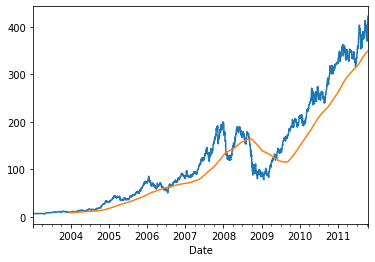

In [75]:
stocks_px["AAPL"].plot()
stocks_px["AAPL"].rolling(250).mean().plot()

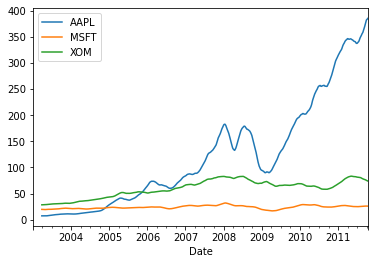

In [76]:
stocks_px.rolling(60).mean().plot()

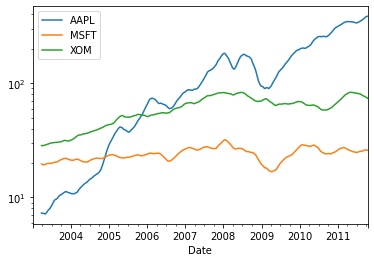

In [77]:
stocks_px.rolling(60).mean().plot(logy=True)

Exponentially weighted functions

An alternative to using a fixed window size with equally weighted observations is to specify a constant decay factor to give more weight to more recent observations. There are a couple of ways to specify the decay factor. A popular one is using a span, which makes the result comparable to a simple moving window function with window size equal to the span.

In [78]:
stocks_ewm = stocks_px['XOM'].ewm(span=3).mean()
stocks_ewm

Date
2003-01-02    29.220000
2003-01-03    29.233333
2003-01-06    29.648571
2003-01-07    29.276000
2003-01-08    29.045806
                ...    
2011-10-10    74.913055
2011-10-11    75.591528
2011-10-12    76.375764
2011-10-13    76.372882
2011-10-14    77.241441
Freq: B, Name: XOM, Length: 2292, dtype: float64

In [79]:
stocks_ewm = stocks_px['XOM'].ewm(halflife=5).mean()
stocks_ewm

Date
2003-01-02    29.220000
2003-01-03    29.230692
2003-01-06    29.508163
2003-01-07    29.338414
2003-01-08    29.206786
                ...    
2011-10-10    73.263460
2011-10-11    73.652655
2011-10-12    74.106679
2011-10-13    74.399665
2011-10-14    74.879965
Freq: B, Name: XOM, Length: 2292, dtype: float64

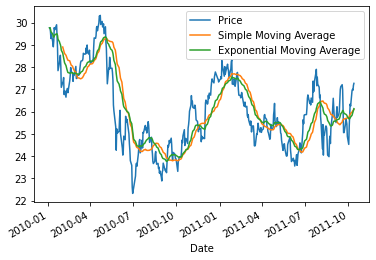

In [80]:
msft_px = stocks['MSFT']['2010':'2011']
moving_avg = msft_px.rolling(30, min_periods=20).mean()
exp_mean = msft_px.ewm(span=30).mean()
msft_px.plot(label="Price")
moving_avg.plot(label="Simple Moving Average")
exp_mean.plot(label="Exponential Moving Average")
plt.legend()
plt.show()